In [1]:
import everest 
%reload_ext autoreload
%autoreload 2
import ktwo19.io
reload(ktwo19.io)
df = ktwo19.io.load_table('ephem-sinukoff16')
df

key
per1           7.91940
per1_err       0.00005
tc1         1980.38370
tc1_err        0.00030
dur1           3.50200
dur1_err       0.06300
per2          11.90715
per2_err       0.00150
tc2         1984.27550
tc2_err        0.00510
dur2           4.37100
dur2_err       1.00000
per3           2.50856
per3_err       0.00041
tc3         1975.92070
tc3_err        0.00860
dur3           2.17000
dur3_err       0.32800
Name: value , dtype: float64

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 201505350.
INFO  [everest.basecamp.compute()]: Computing the model...
INFO  [everest.user.plot()]: Plotting the light curve...


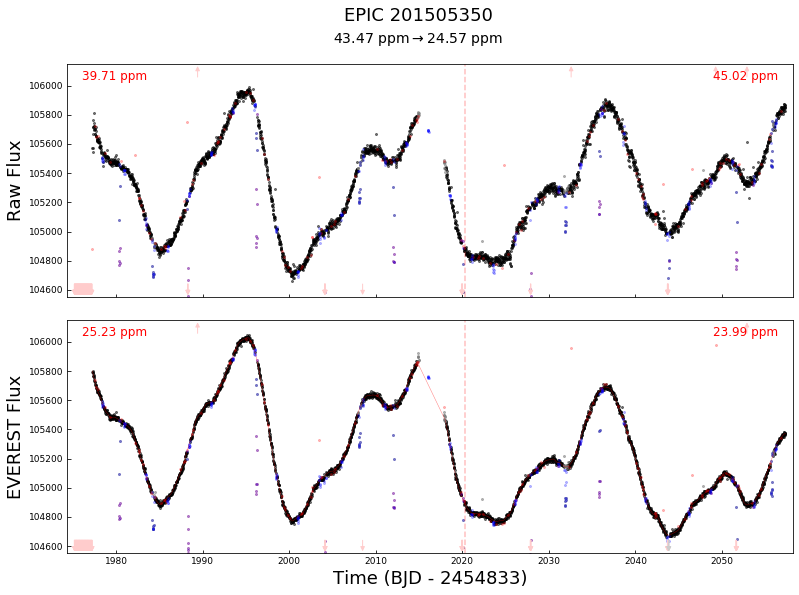

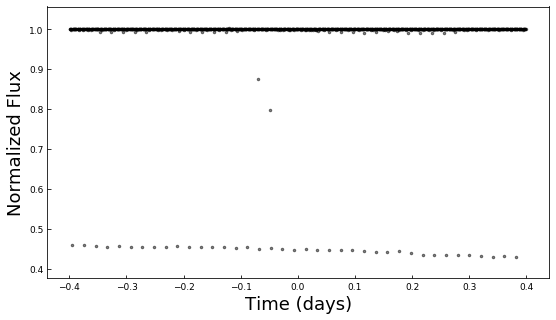

In [2]:
reload(ktwo19.io)
ephem = ktwo19.io.load_table('ephem-sinukoff16')
star = everest.Everest(201505350)
pad  = 1.0
star.mask_planet(ephem.tc1, ephem.per1, dur = (ephem.dur1 +pad) / 24 )
star.mask_planet(ephem.tc2, ephem.per2, dur = (ephem.dur2 +pad) / 24 )
star.mask_planet(ephem.tc3, ephem.per3, dur = (ephem.dur3 +pad) / 24 )
star.compute()
star.plot()
star.plot_folded(ephem.tc3, ephem.per3, dur = 0.2)

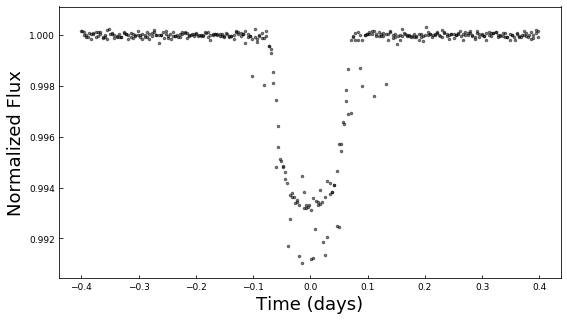

In [3]:
star.plot_folded(ephem.tc1, ephem.per1, dur = 0.2)

In [4]:
plot([1],[1])

NameError: name 'plot' is not defined

In [ ]:
clf()
plot(star.time,star.flux,'.')

mask = np.zeros_like(star.time)
mask[star.outmask] = 1
mask[star.badmask] = 1
mask[star.transitmask] = 0

clf()
fm = ma.masked_array(star.flux,mask )
fm.data[:] = fm.data / ma.median(fm)
fm.mask = fm.mask | (fm < 0.98)
plot(star.time,fm,'.')

In [58]:
fm.__div__?

In [64]:
df = pd.DataFrame(dict(t=star.time,f=fm.data,mask=fm.mask)).to_records(index=False)
from cpsutils.pdplus import LittleEndian as LE
df = LE(df)
df = df['t f mask'.split()]
df = pd.DataFrame(df)
df.to_csv('data/photometry/ktwo-everest.tsv',sep='\t',index=None)

In [71]:
ktwo19.io.load_table('ktwo-everest',cache=1)

Cache not built for table: ktwo-everest
Building cache...
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 201505350.
INFO  [everest.basecamp.compute()]: Computing the model...
writing table ktwo-everest to cache


/Users/petigura/anaconda2/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'ktwo-everest'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,t,f,mask
0,1975.178494,0.469536,True
1,1975.198926,0.468490,True
2,1975.219359,0.469049,True
3,1975.239791,0.469514,True
4,1975.260224,0.466414,True
5,1975.280656,0.468090,True
6,1975.301088,0.467249,True
7,1975.321521,0.465721,True
8,1975.341953,0.465681,True
9,1975.362385,0.466865,True
